 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 6. MLP Basis**
# Section 1. Perceptron

### _Objective_
1. 인공신경망의 기본이 되는 퍼셉트론의 구조에 대해 알아보도록 하겠습니다. <br>
2. 핵심 난제였던 XOR 문제에 대해 배워보도록 하겠습니다. <br>
  
╚═════════════════════════════════════════╝

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<br><br>

# \[ 1. 퍼셉트론이란? \]

----

----

> *퍼셉트론은 신경계 내 뉴런을 모방하여, 수학적으로 정의한 모델입니다.*<br>

## 1. 생물학적 뉴런의 모습
---
* 동물의 대뇌 피질은 뉴런으로 구성되어 있습니다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/1920px-Neuron.svg.png)

* 수상돌기(dentrite) : 신호를 받아들이는 부분
* 세포체(Nucueus) : 신호를 받아 다음 신호의 출력을 결정하는 부분
* 축색돌기(Axon Terminal) : 출력 신호를 전달하는 부분

---
* 개개의 생물학적 뉴런은 아주 단순하게 동작하지만, 두뇌는 이러한 생물학적 뉴런이 수십억개가 모여 구성되어 있습니다.

* 과학자들은 이러한 뉴런처럼, 단순한 Neuron으로 네트워크를 구성하면, 기능을 수행할 수 있지 않을까라는 가설로 Neural Network의 연구가 시작되었습니다.

## 2. 퍼셉트론
---
* 퍼셉트론은 뉴런의 형태를 수학적으로 단순화한 모델입니다.
* 퍼셉트론은 다수의 신호를 입력받아 하나의 신호로 출력합니다.

$$
y = \begin{cases}
0, & (w_1x_1+w_2x_2\le \theta) \\
1, & (w_1x_1+w_2x_2> \theta)
\end{cases}
$$

### (1) 임의의 퍼셉트론 만들기

* 가중치가 아래인 퍼셉트론이 존재한다고 해 봅시다. 

In [40]:
def perceptron(x1,x2):
    w1, w2, theta = 0.5, -0.1, 0.2
    if w1*x1 + w2*x2 <= theta:
        return 0
    else:
        return 1

In [41]:
# [0,0.01,0.02,...,1]의 grid point 만들기
x1s, x2s = np.mgrid[0:1:0.01,
                    0:1:0.01]
x1s = x1s.flatten()
x2s = x2s.flatten()

outs = []
for x1,x2 in zip(x1s, x2s):
    # 각 grid 별로 perceptron 결과 출력
    out = perceptron(x1,x2)
    outs.append(out)

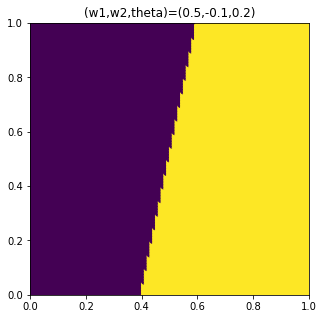

In [42]:
plt.figure(figsize=(5,5))
plt.title("(w1,w2,theta)=(0.5,-0.1,0.2)")
plt.scatter(x1s,x2s,c=outs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

* 퍼셉트론의 weight들의 조합에 따라, 양분하는 선이 다르게 그어집니다.

In [52]:
def perceptron(x1,x2):
    w1, w2, theta = -0.2, 0.5, 0.1
    if w1*x1 + w2*x2 <= theta:
        return 0
    else:
        return 1

In [53]:
# [0,0.01,0.02,...,1]의 grid point 만들기
x1s, x2s = np.mgrid[0:1:0.01,
                    0:1:0.01]
x1s = x1s.flatten()
x2s = x2s.flatten()

outs = []
for x1,x2 in zip(x1s, x2s):
    # 각 grid 별로 perceptron 결과 출력
    out = perceptron(x1,x2)
    outs.append(out)

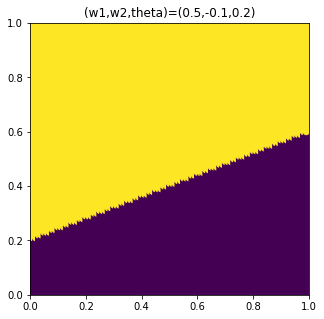

In [54]:
plt.figure(figsize=(5,5))
plt.title("(w1,w2,theta)=(0.5,-0.1,0.2)")
plt.scatter(x1s,x2s,c=outs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

* 퍼셉트론은 X1,X2 평면 위에 무수히 많은 Decision Boundary를 만들 수 있습니다.

## 3. 퍼셉트론으로 논리회로 구현하기
---

* 퍼셉트론 연구에서 가장 먼저 시도했던 것은 바로, 논리 회로 구현입니다.<br>
* 논리 회로는 컴퓨터의 가장 기본이 되는 것으로, AND, OR, NOT 등의 연산으로 이루어져 있습니다.

### (1) AND Gate 만들기

AND gate는 아래와 같이 동작합니다.

|x1|x2|y|
|---|---|---|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|


In [76]:
def AND_gate(x1, x2):
    w1, w2, theta = 0.5,0.5,0.6
    if w1*x1 + w2*x2 <= theta:
        return 0
    else:
        return 1

In [77]:
print("AND(0,0) -> {}".format(AND_gate(0,0)))
print("AND(0,1) -> {}".format(AND_gate(0,1)))
print("AND(1,0) -> {}".format(AND_gate(1,0)))
print("AND(1,1) -> {}".format(AND_gate(1,1)))

AND(0,0) -> 0
AND(0,1) -> 0
AND(1,0) -> 0
AND(1,1) -> 1


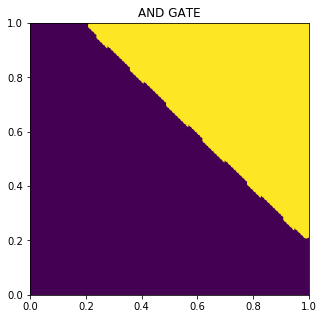

In [80]:
# AND Gate 시각화하기

# [0,0.01,0.02,...,1]의 grid point 만들기
x1s, x2s = np.mgrid[0:1:0.01,
                    0:1:0.01]
x1s = x1s.flatten()
x2s = x2s.flatten()

outs = []
for x1,x2 in zip(x1s, x2s):
    # 각 grid 별로 perceptron 결과 출력
    out = AND_gate(x1,x2)
    outs.append(out)
    
plt.figure(figsize=(5,5))
plt.title("AND GATE")
plt.scatter(x1s,x2s,c=outs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### (2) OR Gate 만들기

OR Gate는 아래와 같이 동작합니다.

|x1|x2|y|
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|


In [89]:
def OR_gate(x1, x2):
    w1, w2, theta = 0.5,0.5,0.3
    if w1*x1 + w2*x2 <= theta:
        return 0
    else:
        return 1

In [90]:
print("OR(0,0) -> {}".format(OR_gate(0,0)))
print("OR(0,1) -> {}".format(OR_gate(0,1)))
print("OR(1,0) -> {}".format(OR_gate(1,0)))
print("OR(1,1) -> {}".format(OR_gate(1,1)))

OR(0,0) -> 0
OR(0,1) -> 1
OR(1,0) -> 1
OR(1,1) -> 1


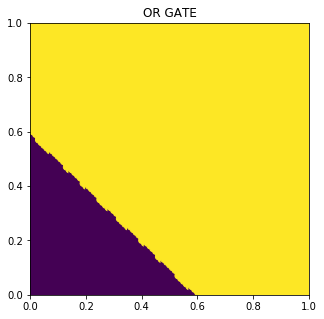

In [91]:
# OR Gate 시각화하기

# [0,0.01,0.02,...,1]의 grid point 만들기
x1s, x2s = np.mgrid[0:1:0.01,
                    0:1:0.01]
x1s = x1s.flatten()
x2s = x2s.flatten()

outs = []
for x1,x2 in zip(x1s, x2s):
    # 각 grid 별로 perceptron 결과 출력
    out = OR_gate(x1,x2)
    outs.append(out)
    
plt.figure(figsize=(5,5))
plt.title("OR GATE")
plt.scatter(x1s,x2s,c=outs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### (3) NAND Gate 만들기

NAND는 아래와 같이 동작합니다.

|x1|x2|y|
|---|---|---|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|


In [95]:
def NAND_gate(x1, x2):
    w1, w2, theta = -0.5,-0.5,-0.7
    if w1*x1 + w2*x2 <= theta:
        return 0
    else:
        return 1

In [96]:
print("NAND(0,0) -> {}".format(NAND_gate(0,0)))
print("NAND(0,1) -> {}".format(NAND_gate(0,1)))
print("NAND(1,0) -> {}".format(NAND_gate(1,0)))
print("NAND(1,1) -> {}".format(NAND_gate(1,1)))

NAND(0,0) -> 1
NAND(0,1) -> 1
NAND(1,0) -> 1
NAND(1,1) -> 0


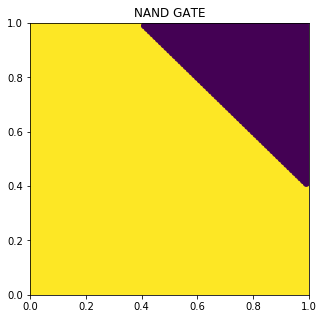

In [98]:
# OR Gate 시각화하기

# [0,0.01,0.02,...,1]의 grid point 만들기
x1s, x2s = np.mgrid[0:1:0.01,
                    0:1:0.01]
x1s = x1s.flatten()
x2s = x2s.flatten()

outs = []
for x1,x2 in zip(x1s, x2s):
    # 각 grid 별로 perceptron 결과 출력
    out = NAND_gate(x1,x2)
    outs.append(out)
    
plt.figure(figsize=(5,5))
plt.title("NAND GATE")
plt.scatter(x1s,x2s,c=outs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### (3) XOR Gate 만들기
XOR은 아래와 같이 동작합니다.

|x1|x2|y|
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

XOR 문제의 핵심은 **단일한 직선**으로 양분할 수 없다는 점에 있습니다.

![Imgur](https://i.imgur.com/ClTEi41.png)

> 한 개의 직선으로 붉은 점과 검은점을 나눌 수 있을까요? 불가능합니다.<br>
단일한 퍼셉트론으로는 할 수 없는 문제입니다.

## 3. 다층 퍼셉트론
---
* 위의 퍼셉트론으로는 해결할 수 없었던 XOR문제는 다층 퍼셉트론으로 해결할 수 있습니다.

### (1) XOR 게이트의 구조



실제로 논리 연산을 구현할 때, XOR 게이트는 단일한 게이트로 이루어져 있지 않고,<br>
AND, OR, NAND gate의 집합으로 이루어져 있습니다.

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/254px_3gate_XOR.jpg)

|x1|x2|s1|s2|y|
|---|---|---|---|---|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|

In [99]:
def XOR_gate(x1,x2):
    s1 = NAND_gate(x1,x2)
    s2 = OR_gate(x1,x2)
    y = AND_gate(s1,s2)
    return y

In [101]:
print("XOR(0,0) -> {}".format(XOR_gate(0,0)))
print("XOR(0,1) -> {}".format(XOR_gate(0,1)))
print("XOR(1,0) -> {}".format(XOR_gate(1,0)))
print("XOR(1,1) -> {}".format(XOR_gate(1,1)))

XOR(0,0) -> 0
XOR(0,1) -> 1
XOR(1,0) -> 1
XOR(1,1) -> 0


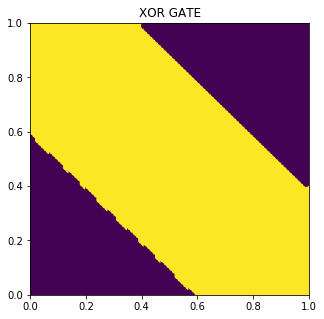

In [102]:
# XOR Gate 시각화하기

# [0,0.01,0.02,...,1]의 grid point 만들기
x1s, x2s = np.mgrid[0:1:0.01,
                    0:1:0.01]
x1s = x1s.flatten()
x2s = x2s.flatten()

outs = []
for x1,x2 in zip(x1s, x2s):
    # 각 grid 별로 perceptron 결과 출력
    out = XOR_gate(x1,x2)
    outs.append(out)
    
plt.figure(figsize=(5,5))
plt.title("XOR GATE")
plt.scatter(x1s,x2s,c=outs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

<br><br>

# \[ 2. MLP(Multi Layer Perceptron)이란? \]

----

----

> *MLP란, 위의 XOR 문제에서 해결한 모델과 같이, 여러 Perceptron이 Layer를 형성해, 연결되어 있는 구조를 의미합니다.*<br>

<br> 
## 1. MLP와 DNN의 관계
---

![Imgur](https://i.imgur.com/qRf0a3W.jpg)

* 일반적으로 MLP는 은닉층이 하나인 Neural Network를 의미하고, <br>
  DNN은 은닉층이 깊게 쌓여있는 Neural Network을 의미합니다.

<br> 
## 2. 퍼셉트론을 기호로 나타내기
---

![Imgur](https://i.imgur.com/S29XQaW.png)

* 퍼셉트론을 위와 같이 기호로 나타낼 수 있습니다. <br>
* 수식으로 풀어내면 아래와 같습니다.<br>
$
z = b + w_1x_1 + w_2x_2 \\
y = h(z)
$

### (1) 가중치 `weight`

$w_1$과 $w_2$는 각 신호의 가중치를 나타내는 매개변수로, 각 신호의 영향력을 제어합니다.

### (2) 편향, `bias`

$b$는 해당 퍼셉트론이 얼마나 쉽게 활성화되느냐를 제어합니다.

### (3) 활성화함수, Activation Function
$h(a)$는 활성화 함수로, 입력 신호의 총합을 출력 신호로 변환하는 함수를 의미합니다.<br>
위의 퍼셉트론에서 구성된 활성화 함수는 아래와 같습니다.

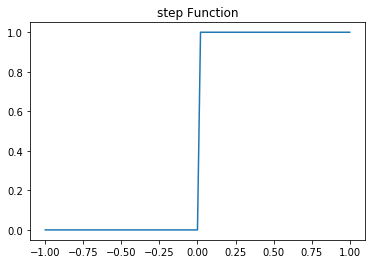

In [12]:
def step_func(x):
    return np.array(x > 0, dtype=np.int)

x = np.linspace(-1.0,1.0,101)
y = step_func(x)

plt.title("step Function")
plt.plot(x,y)
plt.show()

로지스틱 회귀분석에서 이용했던 Logistic function도 일종의 활성화함수입니다.

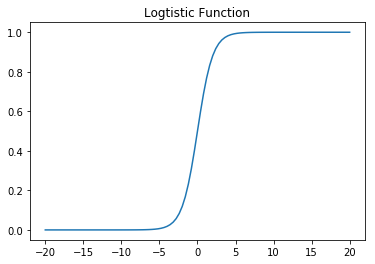

In [14]:
def logistic_func(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-20.0,20.0,101)
y = logistic_func(x)

plt.title("Logtistic Function")
plt.plot(x,y)
plt.show()

### (4) 비선형 함수의 이점

우리는 활성화 함수를 통해, 퍼셉트론의 출력값을 제한합니다.<br>
Step Function과 Logistic Function은 출력값을 제한하는 것 외에도, <br>
**비선형 함수**라는 공통점이 있습니다. 신경망에서는 활성화 함수로 비선형 함수가 필수입니다.<br>

왜냐하면, 선형 함수로는 층을 깊게 쌓을 수 없기 때문입니다.

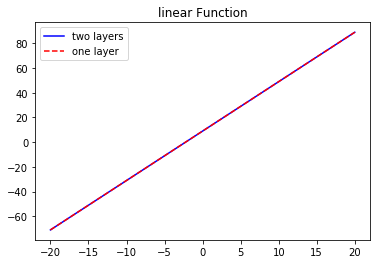

In [23]:
def linear_func(x):
    W = 2
    B = 3
    return x*W + B

x = np.linspace(-20.0,20.0,101)
ff_x = linear_func(linear_func(x))
g_x = x*4 + 9

plt.title("linear Function")
plt.plot(x,ff_x,"b-")
plt.plot(x,g_x,"r--")
plt.legend(['two layers','one layer'])
plt.show()

층을 깊게 쌓으려고 해도, 아래와 같이 결국 하나의 층이 있는 것과<br>
동일해지기 때문입니다.

$
f(x) = 2x+3 \\
g(x) = f(f(x)) \\
\ \ \ \ = 2(2x+3)+3 \\
\ \ \ \ = 4x + 9
$

비선형 함수는 위와 같이 선형 조합으로 풀 수 없기 때문에<br>
층을 쌓으면, 한층으로 해결할 수 없는 모형을 만들 수 있습니다.<br>

이는 한층으로는 XOR 문제를 풀지 못하다가, 2층으로 XOR 문제를 풀 수 있다는 사실을<br>
떠올리면 됩니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/29

---